# Proyecto Final - Numeric

Árboles en Camden / Clasificación 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [36]:
#Cargamos el dataset
#https://opendata.camden.gov.uk/Environment/Trees-In-Camden/csqp-kdss
path="Trees_In_Camden.csv"
df = pd.read_csv(path)
df.head()

,Number Of Trees,Sequence,Site Name,Contract Area,Scientific Name,Common Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,...,Northing,Longitude,Latitude,Location,Identifier,Spatial Accuracy,Last Uploaded,Organisation URI,Ward,Lower Layer Super Output Area (LSOA)
0,0.0,52.0,MINSTER ROAD,Highways,Vacant Tree Pit,Vacant Tree Pit,NaN,NaN,NaN,NaN,...,185312,-0.205041,51.552964,"(51.552964, -0.205041)",00060713,Captured By Camden Officer,22/04/2020 08:31:31 PM,http://opendatacommunities.org/id/london-borou...,5.0,30.0
1,1.0,80.0,YORK WAY,Highways,Liquidambar styraciflua,Sweet Gum,23/10/2019,2022/2023,2.5,1.5,...,183175,-0.122373,51.532448,"(51.532448, -0.122373)",00058161,Captured By Camden Officer,22/04/2020 08:31:12 PM,http://opendatacommunities.org/id/london-borou...,NaN,NaN
2,1.0,21.0,MARESFIELD GARDENS,Highways,Liquidambar styraciflua,Sweet Gum,NaN,NaN,0.0,0.0,...,0,NaN,NaN,NaN,00060264,No spatial information available,22/04/2020 08:31:12 PM,http://opendatacommunities.org/id/london-borou...,NaN,NaN
3,1.0,173.0,Ingestre Road Estate,Housing,Acer pseudoplatanus,Sycamore,12/04/2019,2022/2023,8.0,3.0,...,185768,-0.142017,51.556078,"(51.556078, -0.142017)",00058516,Captured By Camden Officer,22/04/2020 08:31:38 PM,http://opendatacommunities.org/id/london-borou...,12.0,87.0
4,1.0,198.0,Branch Hill Estate,Housing,Ilex aquifolium,Holly,15/04/2020,2023/2024,12.0,9.0,...,185996,-0.183115,51.558770,"(51.55877, -0.183115)",00033256,Captured By Camden Officer,22/04/2020 08:31:59 PM,http://opendatacommunities.org/id/london-borou...,6.0,44.0


In [37]:
df.dtypes

Number Of Trees                                     float64
Sequence                                            float64
Site Name                                            object
Contract Area                                        object
Scientific Name                                      object
Common Name                                          object
Inspection Date                                      object
Inspection Due Date                                  object
Height In Metres                                    float64
Spread In Metres                                    float64
Diameter In Centimetres At Breast Height            float64
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Newly Planted                                        object
Capital Asset Value For Amenity Trees   

In [38]:
#Tamaño de los datos
df.shape

(23356, 33)

In [39]:
df.columns.values.tolist()

['Number Of Trees',
 'Sequence',
 'Site Name',
 'Contract Area',
 'Scientific Name',
 'Common Name',
 'Inspection Date',
 'Inspection Due Date',
 'Height In Metres',
 'Spread In Metres',
 'Diameter In Centimetres At Breast Height',
 'Maturity',
 'Physiological Condition',
 'Tree Set To Be Removed',
 'Removal Reason',
 'Newly Planted',
 'Capital Asset Value For Amenity Trees',
 'Carbon Storage In Kilograms',
 'Gross Carbon Sequestration Per Year In Kilograms',
 'Pollution Removal Per Year In Grams',
 'Ward Code',
 'Ward Name',
 'Easting',
 'Northing',
 'Longitude',
 'Latitude',
 'Location',
 'Identifier',
 'Spatial Accuracy',
 'Last Uploaded',
 'Organisation URI',
 'Ward',
 'Lower Layer Super Output Area (LSOA)']

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target=df['Contract Area'].tolist()
target=label_encoder.fit_transform(target)

In [41]:
df=df.drop(['Contract Area'], axis=1)
df.head()

,Number Of Trees,Sequence,Site Name,Scientific Name,Common Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,...,Northing,Longitude,Latitude,Location,Identifier,Spatial Accuracy,Last Uploaded,Organisation URI,Ward,Lower Layer Super Output Area (LSOA)
0,0.0,52.0,MINSTER ROAD,Vacant Tree Pit,Vacant Tree Pit,NaN,NaN,NaN,NaN,NaN,...,185312,-0.205041,51.552964,"(51.552964, -0.205041)",00060713,Captured By Camden Officer,22/04/2020 08:31:31 PM,http://opendatacommunities.org/id/london-borou...,5.0,30.0
1,1.0,80.0,YORK WAY,Liquidambar styraciflua,Sweet Gum,23/10/2019,2022/2023,2.5,1.5,4.0,...,183175,-0.122373,51.532448,"(51.532448, -0.122373)",00058161,Captured By Camden Officer,22/04/2020 08:31:12 PM,http://opendatacommunities.org/id/london-borou...,NaN,NaN
2,1.0,21.0,MARESFIELD GARDENS,Liquidambar styraciflua,Sweet Gum,NaN,NaN,0.0,0.0,0.0,...,0,NaN,NaN,NaN,00060264,No spatial information available,22/04/2020 08:31:12 PM,http://opendatacommunities.org/id/london-borou...,NaN,NaN
3,1.0,173.0,Ingestre Road Estate,Acer pseudoplatanus,Sycamore,12/04/2019,2022/2023,8.0,3.0,0.0,...,185768,-0.142017,51.556078,"(51.556078, -0.142017)",00058516,Captured By Camden Officer,22/04/2020 08:31:38 PM,http://opendatacommunities.org/id/london-borou...,12.0,87.0
4,1.0,198.0,Branch Hill Estate,Ilex aquifolium,Holly,15/04/2020,2023/2024,12.0,9.0,30.0,...,185996,-0.183115,51.558770,"(51.55877, -0.183115)",00033256,Captured By Camden Officer,22/04/2020 08:31:59 PM,http://opendatacommunities.org/id/london-borou...,6.0,44.0


In [42]:
df['Contract Area']=target
df.head()

,Number Of Trees,Sequence,Site Name,Scientific Name,Common Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,...,Longitude,Latitude,Location,Identifier,Spatial Accuracy,Last Uploaded,Organisation URI,Ward,Lower Layer Super Output Area (LSOA),Contract Area
0,0.0,52.0,MINSTER ROAD,Vacant Tree Pit,Vacant Tree Pit,NaN,NaN,NaN,NaN,NaN,...,-0.205041,51.552964,"(51.552964, -0.205041)",00060713,Captured By Camden Officer,22/04/2020 08:31:31 PM,http://opendatacommunities.org/id/london-borou...,5.0,30.0,2
1,1.0,80.0,YORK WAY,Liquidambar styraciflua,Sweet Gum,23/10/2019,2022/2023,2.5,1.5,4.0,...,-0.122373,51.532448,"(51.532448, -0.122373)",00058161,Captured By Camden Officer,22/04/2020 08:31:12 PM,http://opendatacommunities.org/id/london-borou...,NaN,NaN,2
2,1.0,21.0,MARESFIELD GARDENS,Liquidambar styraciflua,Sweet Gum,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,00060264,No spatial information available,22/04/2020 08:31:12 PM,http://opendatacommunities.org/id/london-borou...,NaN,NaN,2
3,1.0,173.0,Ingestre Road Estate,Acer pseudoplatanus,Sycamore,12/04/2019,2022/2023,8.0,3.0,0.0,...,-0.142017,51.556078,"(51.556078, -0.142017)",00058516,Captured By Camden Officer,22/04/2020 08:31:38 PM,http://opendatacommunities.org/id/london-borou...,12.0,87.0,3
4,1.0,198.0,Branch Hill Estate,Ilex aquifolium,Holly,15/04/2020,2023/2024,12.0,9.0,30.0,...,-0.183115,51.558770,"(51.55877, -0.183115)",00033256,Captured By Camden Officer,22/04/2020 08:31:59 PM,http://opendatacommunities.org/id/london-borou...,6.0,44.0,3


In [43]:
df.isnull().any().any()

True

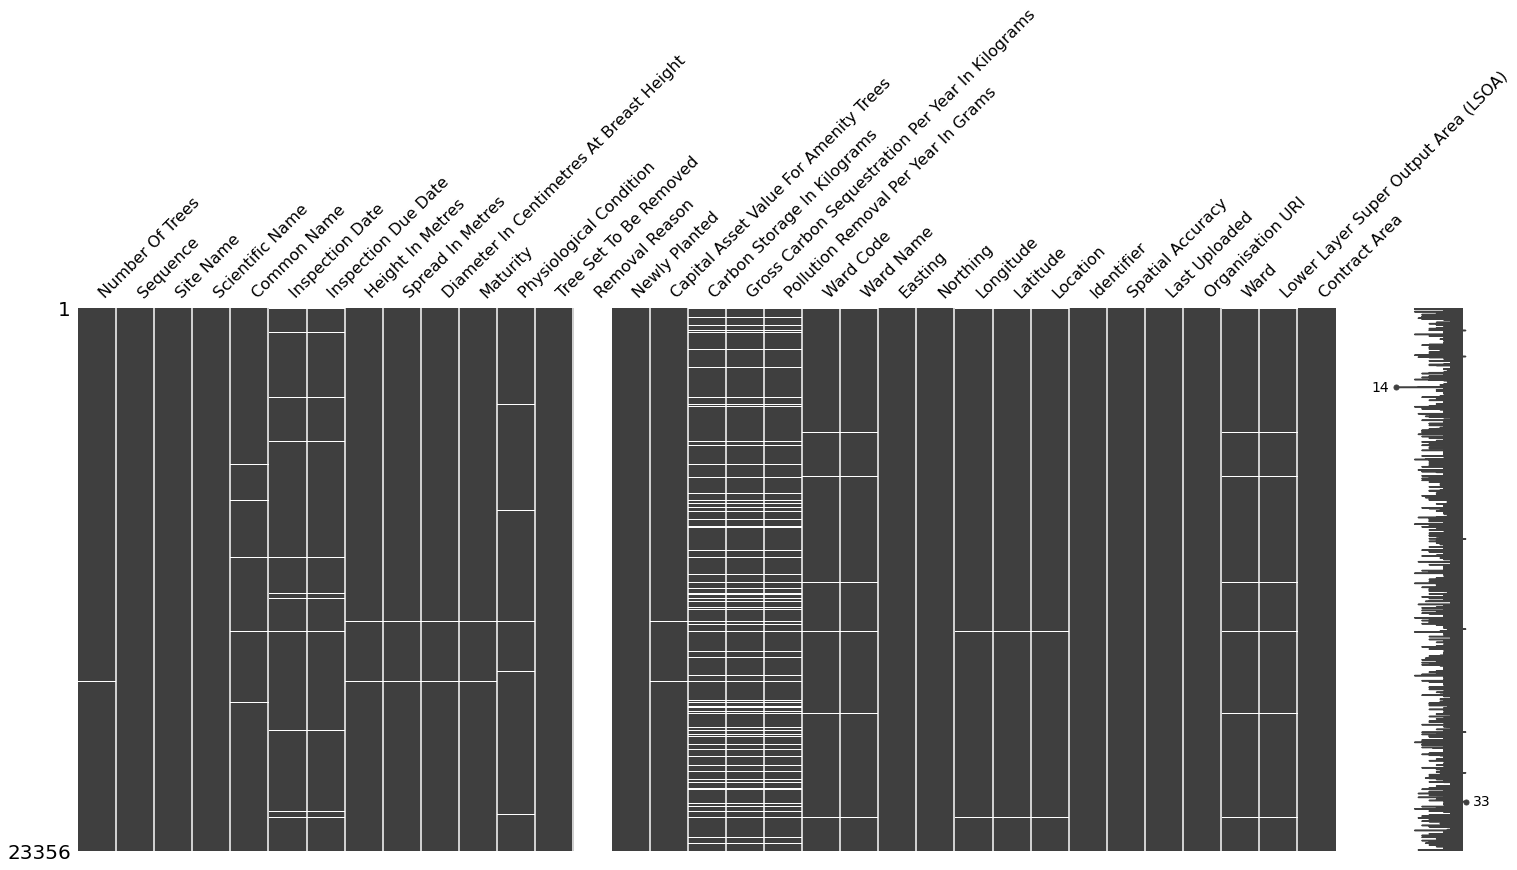

In [44]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

# Características numericas

Creo que solo debemos quedarnos con las caracteristicas numericas, eliminando las columnas que no lo son

Target= 'Scientific Name'

Columas con que quedarnos 'Heigt in Metres', 'Spreed in Metres', 'Diameter In Centimetres At Breast Height'

En duda 'Ward'

In [8]:
#df.replace({' ': np.nan}, inplace=True)
#df.isnull().any().any()
#msno.matrix(df)

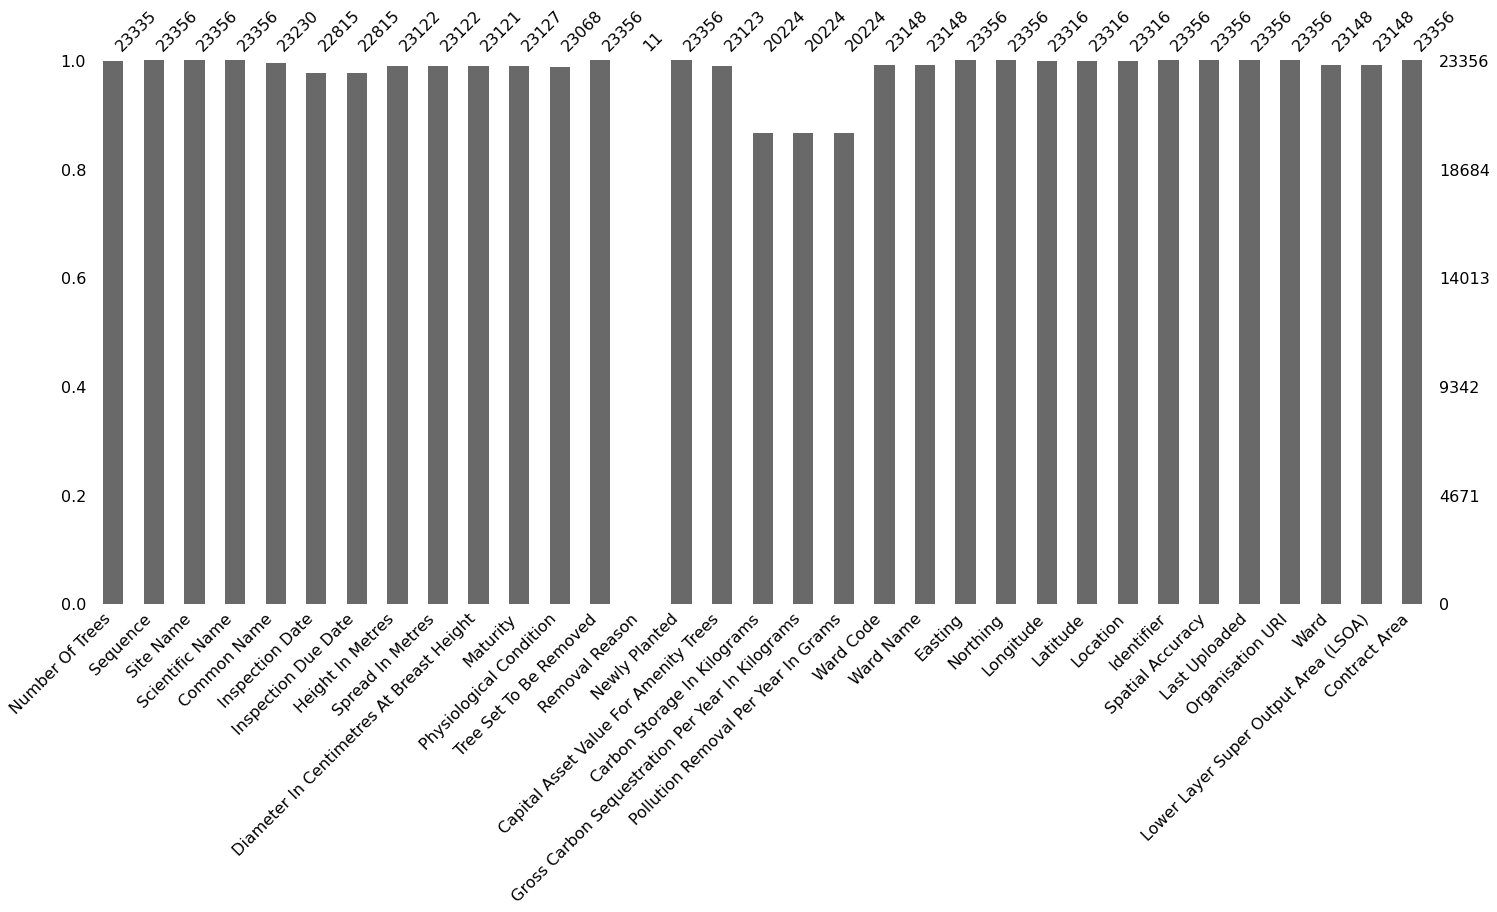

In [45]:
msno.bar(df)

In [46]:
dn=df.select_dtypes(['number'])

In [47]:
dn.shape

(23356, 16)

In [48]:
dn.tail()

,Number Of Trees,Sequence,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams,Easting,Northing,Longitude,Latitude,Ward,Lower Layer Super Output Area (LSOA),Contract Area
23351,1.0,223.0,14.0,8.0,29.0,9072.76,120.3,3.6,430.5,525108,184428,-0.197199,51.544888,13.0,90.0,4
23352,1.0,83.0,22.0,9.0,42.0,17127.12,269.7,6.8,365.0,529744,183457,-0.130738,51.535117,16.0,112.0,4
23353,1.0,125.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,526392,184195,-0.178788,51.542510,17.0,120.0,2
23354,1.0,18.0,7.0,2.0,11.0,1044.28,11.9,1.0,20.0,528335,186329,-0.150000,51.561247,10.0,68.0,3
23355,1.0,165.0,7.0,2.0,11.0,1044.28,16.5,1.6,12.6,528077,185430,-0.154053,51.553233,7.0,48.0,3


# Tenemos que calcular los NaN o eliminarlos

In [49]:
#Elementos unicos por columna 
for i in dn:
    print(i)
    print(dn[i].nunique())
    print(dn[i].unique())
    print('*-----*-----*-----*-----*-----*-----*-----*-----')

Number Of Trees
30
[ 0.  1.  6.  4.  3.  2. 52.  5.  9. nan  7. 11.  8. 13. 10. 50. 20. 16.
 40. 26. 33. 15. 25. 65. 12. 24. 18. 51. 21. 32. 67.]
*-----*-----*-----*-----*-----*-----*-----*-----
Sequence
1109
[ 52.  80.  21. ... 852. 919. 788.]
*-----*-----*-----*-----*-----*-----*-----*-----
Height In Metres
94
[ nan  2.5  0.   8.  12.  19.   4.   1.  22.  10.   5.   6.   3.   7.
  2.  13.   1.8 21.   2.1  9.  15.  20.  17.  11.  14.  18.  23.  26.
 16.   3.8  3.5 24.  16.1  2.3 25.  29.   0.5 22.5 30.  27.  15.5 12.4
 36.   2.6 31.  28.  33.   2.2 39.   2.8  2.7 23.8 17.4  6.8 37.  17.5
 32.  13.9  1.5 35.  34.   3.7 13.7  9.4  3.2  4.5 10.8 38.  11.8 30.4
 14.7 31.6  3.6 23.1  9.8 12.3 19.5  5.5  9.3  6.5  7.7 13.6 41.   8.3
 23.4 24.9  0.2 10.2 11.6 11.4 15.7 24.5  7.5 22.3 40. ]
*-----*-----*-----*-----*-----*-----*-----*-----
Spread In Metres
53
[  nan  1.5   0.    3.    9.   12.    5.    1.    2.    6.   11.   16.
  8.    4.   10.    7.    2.5  17.   14.   20.   13.   19.    1.8

In [50]:
dn.agg(['count', 'size', 'nunique'])

,Number Of Trees,Sequence,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams,Easting,Northing,Longitude,Latitude,Ward,Lower Layer Super Output Area (LSOA),Contract Area
count,23335,23356,23122,23122,23121,23123,20224,20224,20224,23356,23356,23316,23316,23148,23148,23356
size,23356,23356,23356,23356,23356,23356,23356,23356,23356,23356,23356,23356,23356,23356,23356,23356
nunique,30,1109,94,53,187,1501,3907,448,1851,6376,5587,19976,17870,18,133,5


In [51]:
dn.isnull().sum(axis = 0)

Number Of Trees                                       21
Sequence                                               0
Height In Metres                                     234
Spread In Metres                                     234
Diameter In Centimetres At Breast Height             235
Capital Asset Value For Amenity Trees                233
Carbon Storage In Kilograms                         3132
Gross Carbon Sequestration Per Year In Kilograms    3132
Pollution Removal Per Year In Grams                 3132
Easting                                                0
Northing                                               0
Longitude                                             40
Latitude                                              40
Ward                                                 208
Lower Layer Super Output Area (LSOA)                 208
Contract Area                                          0
dtype: int64

   # Eliminamos los nan

In [52]:
save=dn.dropna()
save.isnull().any().any()

False

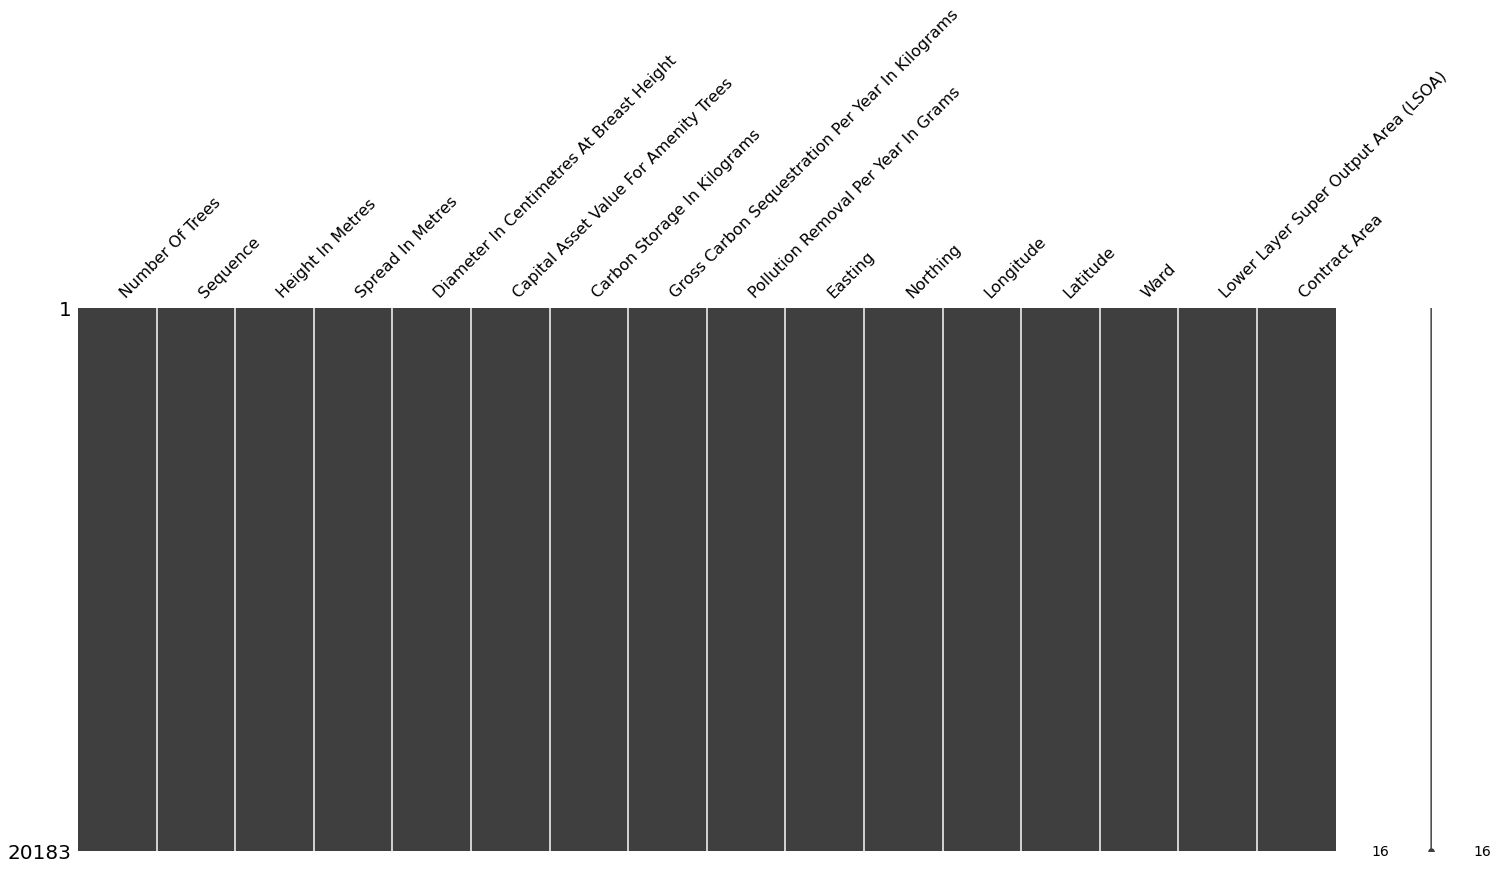

In [53]:
msno.matrix(save)

In [54]:
save.to_csv('Trees_in_camden_cleanWithAll.csv', index=False)